#**Histogram Analysis**#

##In this section, histogram analysis is employed to assess the mixing performance of the two primary colors—red and blue—within the image. This approach provides a statistical overview of how color intensities are distributed and how effectively the two colors are blended.

##To comprehensively evaluate the quality of the mixing, several quantitative metrics have been applied to compare the histograms of the red and blue channels. These metrics include:

##**Entropy Analysis:** Measures the randomness or complexity of pixel intensity distribution. Higher entropy typically indicates a more complex and possibly more uniform color mix.

##**Histogram Intersection:** Calculates the overlap between the histograms of the red and blue channels, with higher values indicating greater similarity and better blending.

##**Chi-square Distance:** Assesses the divergence between the two histograms. A lower value suggests that the red and blue channels have similar distributions, implying effective mixing.

##**Bhattacharyya Distance:** Quantifies the amount of overlap between the histograms, offering a probabilistic measure of similarity. A smaller distance signifies closer distribution and better color integration.

##**Correlation:** Measures the linear relationship between the two histograms. A high correlation value indicates that variations in red and blue intensities occur in tandem, which reflects a more synchronized mix.

##**Kullback-Leibler (KL) Divergence:** Evaluates how one histogram diverges from another. A lower KL divergence indicates that the red and blue histograms are more similar, supporting a conclusion of more balanced mixing.

##Together, these histogram-based metrics provide a robust framework for analyzing the spatial and statistical quality of color blending, helping to identify whether the red and blue components are evenly and effectively mixed across the image.

##Including Necessary Library

In [ ]:
import cv2
import matplotlib.pyplot as plt
from scipy.stats import entropy
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image_path_data = './sample_data/5050_210_SP_003_O.jpg'

##Histogram Ploting for two colors (Red and Blue)
### Frequency versus Intensity

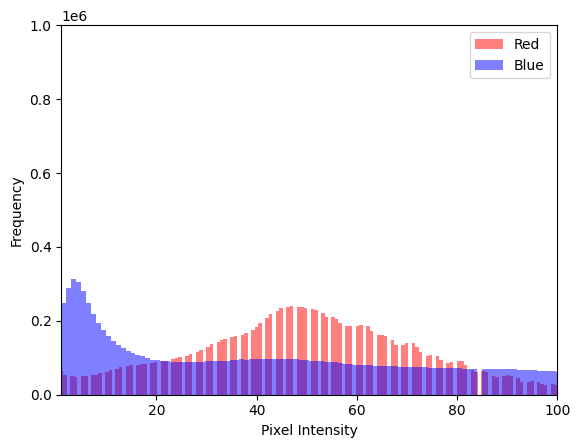

In [ ]:
####  Histogram Analysis  #######################
#################################################
#       HISTOGRAM ANALYSIS                      #
#################################################
#################################################


def analyze_histograms(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot histograms for red and blue channels
    plt.hist(image[:, :, 0].ravel(), bins=256, color='red', alpha=0.5, label='Red')
    plt.hist(image[:, :, 2].ravel(), bins=256, color='blue', alpha=0.5, label='Blue')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([1, 100])
    plt.ylim([0, 1000000])
    plt.legend()
    plt.show()

# Example usage
analyze_histograms(image_path_data)

##Histogram Ploting for two colors (Red and Blue)
### Density versus Intensity

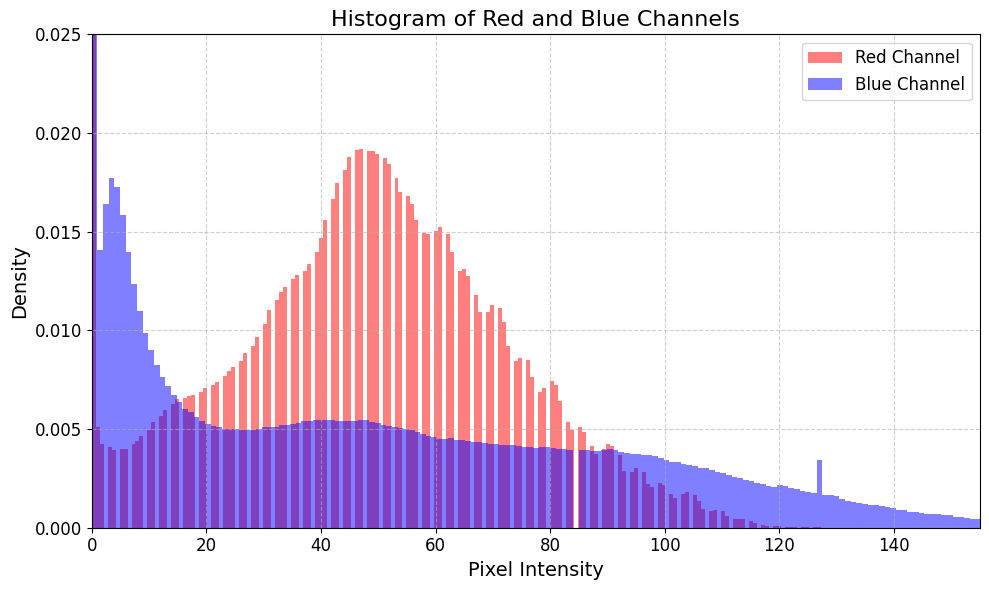

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def analyze_histograms(image_path):
    # Load the image and convert to RGB
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Extract red and blue channels
    red_channel = image[:, :, 0].ravel()
    blue_channel = image[:, :, 2].ravel()

    # Create a figure with a larger size
    plt.figure(figsize=(10, 6))

    # Plot histograms for red and blue channels
    plt.hist(red_channel, bins=256, color='red', alpha=0.5, label='Red Channel', density=True)
    plt.hist(blue_channel, bins=256, color='blue', alpha=0.5, label='Blue Channel', density=True)

    # Add KDE for smoother visualization
    #kde_red = gaussian_kde(red_channel)
    #kde_blue = gaussian_kde(blue_channel)
    #x_values = np.linspace(0, 255, 1000)
    #plt.plot(x_values, kde_red(x_values), color='darkred', label='Red KDE')
    #plt.plot(x_values, kde_blue(x_values), color='darkblue', label='Blue KDE')

    # Add title and labels
    plt.title('Histogram of Red and Blue Channels', fontsize=16)
    plt.xlabel('Pixel Intensity', fontsize=14)
    plt.ylabel('Density', fontsize=14)

    # Add grid lines
    plt.grid(True, linestyle='--', alpha=0.6)

    # Set axis limits
    plt.xlim([0, 155])
    plt.ylim([0, 0.025])  # Adjust based on your data

    # Add legend
    plt.legend(fontsize=12)

    # Increase tick label size
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

    # Show the plot
    plt.tight_layout()
    plt.savefig('./sample_data/histogram_plot_001.png', dpi=300)
    plt.show()

# Example usage
analyze_histograms(image_path_data)

##Entropy Analysis

In [ ]:
############ Entropy Analysis ##########################
########################################################
########### ENTROPY ANALYSIS ###########################
# Entropy is a useful metric for evaluating the uniformity of color mixing.
# Higher entropy indicates better mixing, while lower entropy indicates poorer mixing.
########################################################

def calculate_entropy(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate entropy for red and blue channels
    red_entropy = entropy(np.histogram(image[:, :, 0], bins=256)[0])
    blue_entropy = entropy(np.histogram(image[:, :, 2], bins=256)[0])

    return (red_entropy + blue_entropy) / 2

# Example usage
entropy_value = calculate_entropy(image_path_data)
print(f"Entropy: {entropy_value:.2f}")

Entropy: 2.70


##Histogram Intersection

In [ ]:
########## Histogram Intersection ###################
######################################################
################ HISTOGRAM INTERSECTION ##############
# Higher intersection indicates better mixing, while lower intersection indicates poorer mixing.
######################################################


def calculate_histogram_intersection(image_path):
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate histograms for red and blue channels
    red_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    blue_hist = cv2.calcHist([image], [2], None, [256], [0, 256])

    # Normalize the histograms
    red_hist = cv2.normalize(red_hist, red_hist).flatten()
    blue_hist = cv2.normalize(blue_hist, blue_hist).flatten()

    # Calculate histogram intersection
    intersection = np.minimum(red_hist, blue_hist).sum()
    return intersection

# Example usage
image_path = image_path_data
intersection_index = calculate_histogram_intersection(image_path)
print(f"Histogram Intersection Index: {intersection_index:.2f}")

Histogram Intersection Index: 0.78


##Chi-Square Distance

In [ ]:
########## Chi-Square Distance #######################
#Lower Chi-Square Distance indicates better mixing, while higher distance indicates poorer mixing.
################ CHI-SQUARE DISTANCE  ################
######################################################

image_path = image_path_data

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Calculate histograms for red and blue channels
red_hist = cv2.calcHist([image], [0], None, [256], [0, 256])
blue_hist = cv2.calcHist([image], [2], None, [256], [0, 256])

# Normalize the histograms
red_hist = cv2.normalize(red_hist, red_hist).flatten()
blue_hist = cv2.normalize(blue_hist, blue_hist).flatten()


chi_square = cv2.compareHist(red_hist, blue_hist, cv2.HISTCMP_CHISQR)
print(f"Chi-Square Distance: {chi_square:.2f}")

Chi-Square Distance: 199.21


##Bhattacharyya Distance

In [ ]:
############## Bhattacharyya Distance #####################
################## BATTACHARYYA DISTANCE ##################
# Lower Bhattacharyya Distance indicates better mixing, while higher distance indicates poorer mixing.
###########################################################

bhattacharyya = cv2.compareHist(red_hist, blue_hist, cv2.HISTCMP_BHATTACHARYYA)
print(f"Bhattacharyya Distance: {bhattacharyya:.2f}")

Bhattacharyya Distance: 0.82


##Correlation

In [ ]:
############# Correlation ################################
# If the correlation is close to 1, it means the red and blue histograms are very similar, indicating good mixing.
#################### CORRELATION #########################
##########################################################

correlation = cv2.compareHist(red_hist, blue_hist, cv2.HISTCMP_CORREL)
print(f"Correlation: {correlation:.2f}")

Correlation: 0.73


##KL Divergence

In [ ]:
############## divergence ####################
# Lower divergence indicates better mixing, while higher divergence indicates poorer mixing.
###########################################

from scipy.stats import entropy

def calculate_kl_divergence(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Calculate histograms for red and blue channels
    red_hist = cv2.calcHist([image], [0], None, [256], [0, 256]).flatten()
    blue_hist = cv2.calcHist([image], [2], None, [256], [0, 256]).flatten()

    # Normalize the histograms
    red_hist = red_hist / np.sum(red_hist)
    blue_hist = blue_hist / np.sum(blue_hist)

    # Calculate KL divergence
    kl_divergence = entropy(red_hist, blue_hist)
    return kl_divergence

# Example usage
kl_div = calculate_kl_divergence(image_path_data)
print(f"KL Divergence: {kl_div:.4f}")

KL Divergence: 2.7911
